Description :

You I met under very random circumstances. Let"s call it fate! ❤️

Anyway, after watching your Tik-Tok for only two days , I decided that our story couldn't end there. So, despite the fact that you are in tundla , I tried to shorten the ~250 km distance that separeted us through online conversations.

I started stalking 😂 you on instagram . Repeatedly watched all your tiktok videos 🙈 . For all of our communications we have  used instagram and Since you are mostly busy due to high numbers of dms , so there is a very little data stored about our conversatation !

As 3 months of me finding you is approaching, and because I'm a super data nerd , and i have a lot of free time I decided to explore a little bit about our conversations.

This is intended to find out, if I am a psyscho or not 😂😂. (answer is in the end 🙊)

Getting all the required tools ( No problem at all if you don't understand next few lines 😂)

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt 
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
from pandas.io.json import json_normalize

So i  have already downloaded our chat from instagram . Now let's just load it .

In [46]:
with open(r'C:\Users\rk773\Downloads/insta_messages_1.json','rb') as f:
    data = json.load(f)
chat_data = json_normalize(data)
chat_data_final= chat_data[['sender','created_at','story_share','text',]]
chat_data_final.dropna()
chat_data_final['created_at'] = pd.to_datetime(chat_data_final['created_at'])
chat_data_final.dropna(subset=['created_at'])
chat_data_final.rename(columns={"created_at": "date_time"})

C:\Users\rk773\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,sender,date_time,story_share,text
0,anurag__542,2020-03-08 07:56:39.138517+00:00,Shared 8teen_wolf's story,😂
1,anurag__542,2020-03-08 05:20:14.082991+00:00,NaN,NaN
2,8teen_wolf,2020-03-07 21:51:25.690220+00:00,NaN,Bilkul😂
3,anurag__542,2020-03-07 20:14:15.427134+00:00,NaN,Vaise bhi mhare chhore chhoriyo se km hai ke 😂...
4,anurag__542,2020-03-07 19:33:28.038828+00:00,NaN,Aaj women's day pe kuchh shi video bnao
...,...,...,...,...
1017,8teen_wolf,2019-12-24 17:38:13.731670+00:00,NaN,Aree
1018,anurag__542,2019-12-24 17:37:33.285893+00:00,NaN,Abhi Mai so gya hota to post miss ho jata 😂😂
1019,8teen_wolf,2019-12-24 17:37:11.511556+00:00,NaN,Me😂
1020,anurag__542,2019-12-24 17:36:43.034559+00:00,Shared 8teen_wolf's story,Good night ke baad kaun post krta hai 🤦🤦


so now let's just divide our chat in two parts and let's start with one where you texted 😍 

In [47]:
df_teen_wolf = chat_data_final[chat_data_final.sender == '8teen_wolf']
df = df_teen_wolf
df = df.set_index(pd.DatetimeIndex(df_teen_wolf['created_at']))
#df.index = pd.to_datetime(df_teen_wolf['created_at'])
df.index = df.index.tz_convert('Asia/Kolkata')

Now let's find out  total number of text you sent , number of words used by you and average number of words used by you per per text. 

In [48]:
number_of_text_himani = df.text.count()
print( 'total number of text by you = %d '  % number_of_text_himani )
words_used_himani = df_teen_wolf.text.str.split(expand=True).stack().value_counts().sum ()
print( 'total number of words used by you = %d '  % words_used_himani )
average_himani = words_used_himani/number_of_text_himani
print('Average number of words used per text = %.2f '  % average_himani )

total number of text by you = 313 
total number of words used by you = 870 
Average number of words used per text = 2.78 


313 text in around 3 months Not as bad as i thougth 🤗 , but  not as good as i imagined 😕 . but i mean it's fine.

Now let's draw a graph of number of text sent on a daily basis  

Text(0, 0.5, 'Number ')

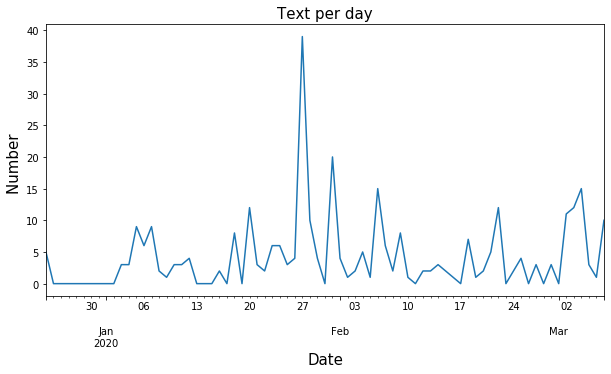

In [49]:
messages_day_himani = df.groupby(pd.Grouper(key="created_at", freq='D')).count()
messages_day_himani.text.plot(figsize=(10,5),label='daily_number')
plt.title('Text per day', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number ', fontsize=15)

It's all good but sad thing is there are total 22 days when i got 0 replies 😭

Now lets find out out which is your favourite weekday to check messages.🤔

Text(0, 0.5, 'Number ')

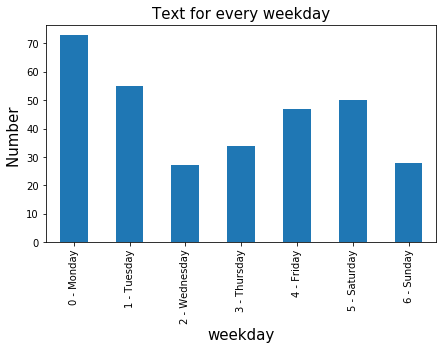

In [50]:
week_days_himani = {0:'0 - Monday',1:'1 - Tuesday',2:'2 - Wednesday',3:'3 - Thursday',4:'4 - Friday',5:'5 - Saturday',6:'6 - Sunday'}
df['weekday'] = df['created_at'].apply(lambda x: week_days_himani[x.weekday()])
df.groupby('weekday')['created_at'].count().plot(kind='bar',figsize=(7,4))
plt.title('Text for every weekday', fontsize=15)
plt.xlabel('weekday', fontsize=15)
plt.ylabel('Number ', fontsize=15)

So on Sunday and wednesday i am least likely to get a reply and and saturday and monday i should expect that you are free 😁

But what about most likely time i should expect a reply 🤔

Text(0, 0.5, 'Number ')

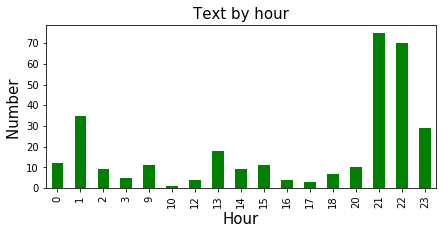

In [51]:
times = pd.DatetimeIndex(df.index)
df.groupby([times.hour]).text.count().plot(kind='bar',figsize=(7,3),color='g')
plt.title('Text by hour', fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number ', fontsize=15)

So it's clear that there is a gap between 3 and 9 in the morning , that's bcz you sleep after 3 and wakeup after 9 (creepy 😆) 
and you are most likely to check dms after 9 in the evening , i am guessing that's after dinner 😋. 

Now let's start with my chats 😬

In [53]:
df_anurag = chat_data_final[chat_data_final.sender == 'anurag__542']
df1 = df_anurag
df1 = df1.set_index(pd.DatetimeIndex(df_anurag['created_at']))
#df.index = pd.to_datetime(df_teen_wolf['created_at'])
df1.index = df1.index.tz_convert('Asia/Kolkata')

In [65]:
number_of_text_anurag = df1.text.count()
print( 'total number of text by you = %d '  % number_of_text_anurag )
words_used_anurag = df1.text.str.split(expand=True).stack().value_counts().sum ()
print( 'total number of words used by me = %d '  % words_used_anurag )
average = words_used_anurag/number_of_text_anurag
print('Average number of words used per text = %.2f '  % average )

total number of text by you = 642 
total number of words used by me = 6705 
Average number of words used per text = 10.44 


Wow 6705 words , that's too much in your comparision 😐.

Text(0, 0.5, 'Number ')

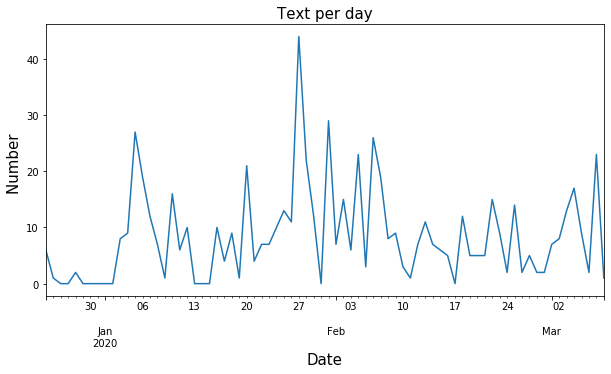

In [55]:
messages_day_anurag = df1.groupby(pd.Grouper(key="created_at", freq='D')).count()
messages_day_anurag.text.plot(figsize=(10,5),label='daily_number')
plt.title('Text per day', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Number ', fontsize=15)

Text(0, 0.5, 'Number ')

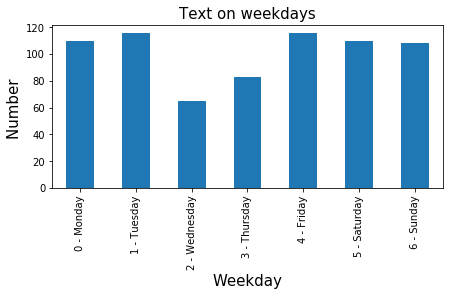

In [56]:
week_days = {0:'0 - Monday',1:'1 - Tuesday',2:'2 - Wednesday',3:'3 - Thursday',4:'4 - Friday',5:'5 - Saturday',6:'6 - Sunday'}
df1['weekday'] = df1['created_at'].apply(lambda x: week_days[x.weekday()])
df1.groupby('weekday')['created_at'].count().plot(kind='bar',figsize=(7,3))
plt.title('Text on weekdays', fontsize=15)
plt.xlabel('Weekday', fontsize=15)
plt.ylabel('Number ', fontsize=15)

I am pretty consitent in messeging you every day of week (#no discrimination 🤣)

Text(0, 0.5, 'Number ')

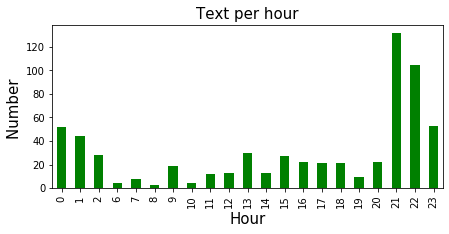

In [58]:
times = pd.DatetimeIndex(df1.index)
df1.groupby([times.hour]).text.count().plot(kind='bar',figsize=(7,3),color='g')
plt.title('Text per hour', fontsize=15)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number ', fontsize=15)

And also with time seems like i can message you every hour of the day ( dude get a life , you use too much cellphone 😄😄)

Side by side comparision of our total num. of text sent

Text(0, 0.5, 'number')

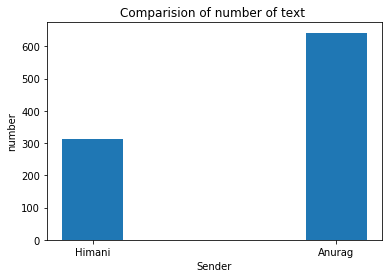

In [63]:
fig, ax  = plt.subplots()
ax.bar([.2, .4], [314, 642], width=.05,
       tick_label=['Himani', 'Anurag'], align='center')
ax.set_xlabel('Sender')
ax.set_title('Comparision of number of text ')
ax.set_ylabel('number')

Doesn't seem so bad right , like i have sent only twice the number of your messages 😀

Text(0, 0.5, 'number')

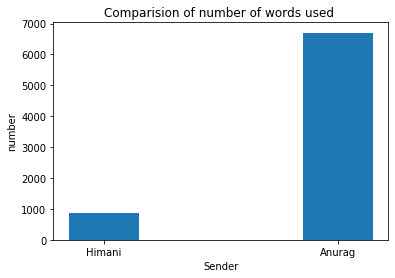

In [64]:
fig, ax  = plt.subplots()
ax.bar([.5, 1.5], [870, 6705], width=.3,
       tick_label=['Himani', 'Anurag'], align='center')
ax.set_xlabel('Sender')
ax.set_title('Comparision of number of words used ')
ax.set_ylabel('number')

Ok so i need to stop sending you long stories 😐.
And answer to question weather i am pyscho : Nah i don't think so maybe but i am  border line case 😁😁.

It was just for fun and nothing serious , just be friends that's all  🤗 .